In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading(Data Source: JHU)

In [22]:
deaths_df     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,90,95,104,106,109,115,120,122,127,132
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,465,470,476,483,488,494,502,507,515,522
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,45,46,46,47,47,48,48,48,48,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [23]:
cols = deaths_df.keys()
deaths  = deaths_df.loc[:, cols[4]:]
confirmed  = confirmed_df.loc[:, cols[4]:]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,0,0,0,0,0,0,0,0,0,0,...,90,95,104,106,109,115,120,122,127,132
1,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,0,0,0,0,0,0,0,0,0,0,...,465,470,476,483,488,494,502,507,515,522
3,0,0,0,0,0,0,0,0,0,0,...,45,46,46,47,47,48,48,48,48,49
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


# COVID19 Country/Region Deaths Comparison

## Legend:

- RED: Critical
- BLUE: Mid-level
- GREEN: Stable
- Horizontal line: Zero Cases

Reported Mean Mortality Rate = 0.045745200499792166


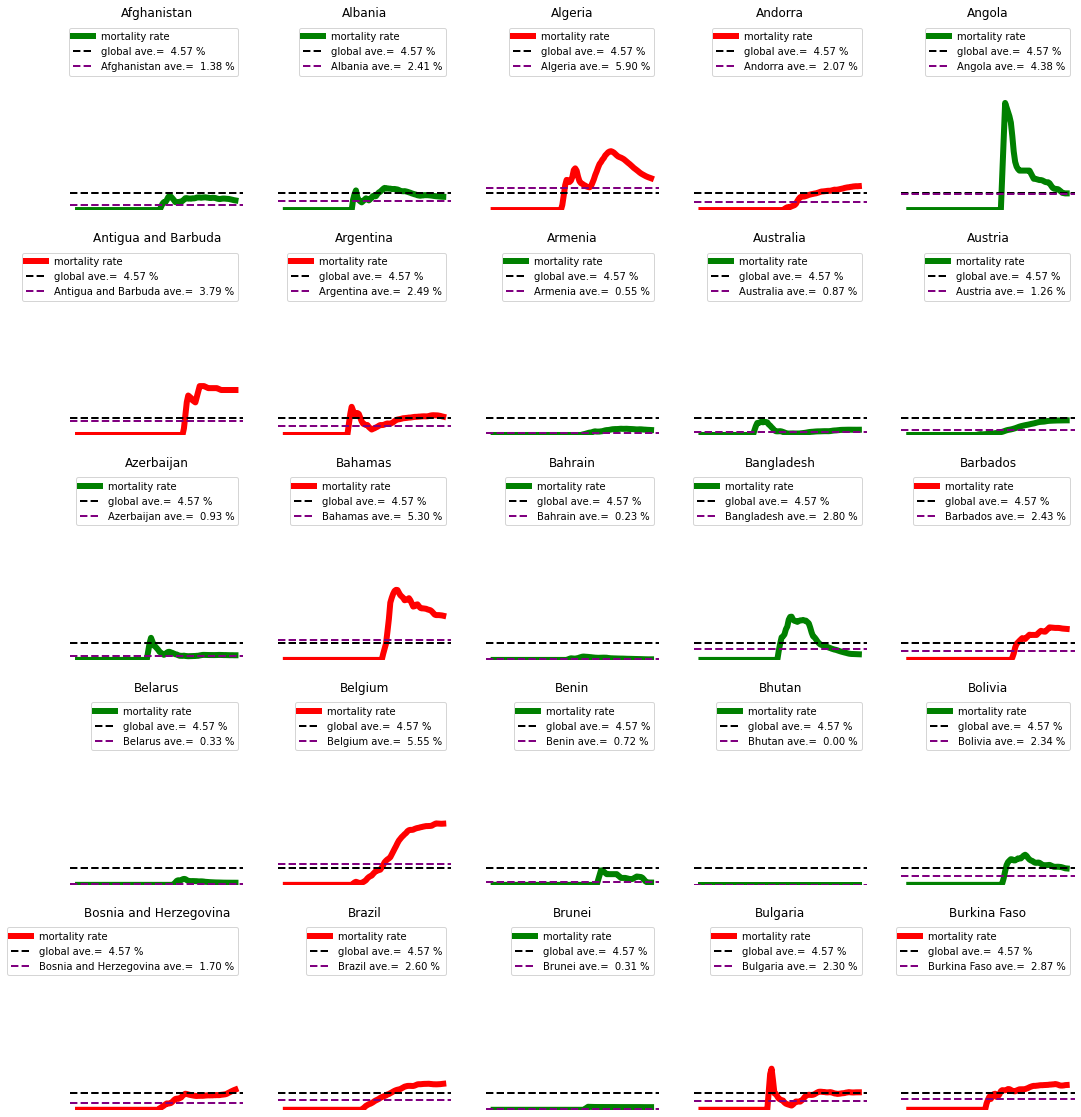

In [128]:
dates       = deaths.keys()
country_reg = deaths_df['Country/Region'].unique()

world_cases     = [confirmed[i].sum() for i in dates]
world_deaths    = [deaths[i].sum() for i in dates]
mortality_rate  = np.array(world_deaths)/np.array(world_cases)
mean_mortality_rate = np.mean(mortality_rate)

max_mortality = np.max(mortality_rate)
print('Reported Mean Mortality Rate =', mean_mortality_rate)


def plot_cases(start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_reg):
            country = country_reg[idx-1]
            total_deaths = [deaths_df[deaths_df['Country/Region']==country][i].sum() for i in dates]
            covid_cases  = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
            deaths_arr = np.array(total_deaths)
            cases_arr  = np.array(covid_cases)
            mortality_rate  = pd.Series(np.divide(deaths_arr, cases_arr, out=np.zeros(deaths_arr.shape), where=cases_arr!=0))
            mortality_ma = mortality_rate.rolling(window=3).mean()
            height = mortality_ma.max() - mortality_ma.min()
            if mortality_ma.iloc[-1] < mean_mortality_rate:
                color = 'green'
            else:
                color = 'red'
            
            country_mortality_rate = np.mean(mortality_rate)
                
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), mortality_ma, linewidth=6, color = color)
            plt.axhline(y = mean_mortality_rate,linestyle='--', color='black', linewidth=2)
            plt.axhline(y = country_mortality_rate,linestyle='--', color='purple', linewidth=2)
            plt.legend(['mortality rate', f'global ave.= {100*mean_mortality_rate: 0.2f} %', f'{country} ave.= {100*country_mortality_rate: 0.2f} %'])
            plt.title(f'{country}')
            plt.ylim([0, 0.5])
            plt.axis('off')

    plt.show()
    
k = 0    
plot_cases(k)

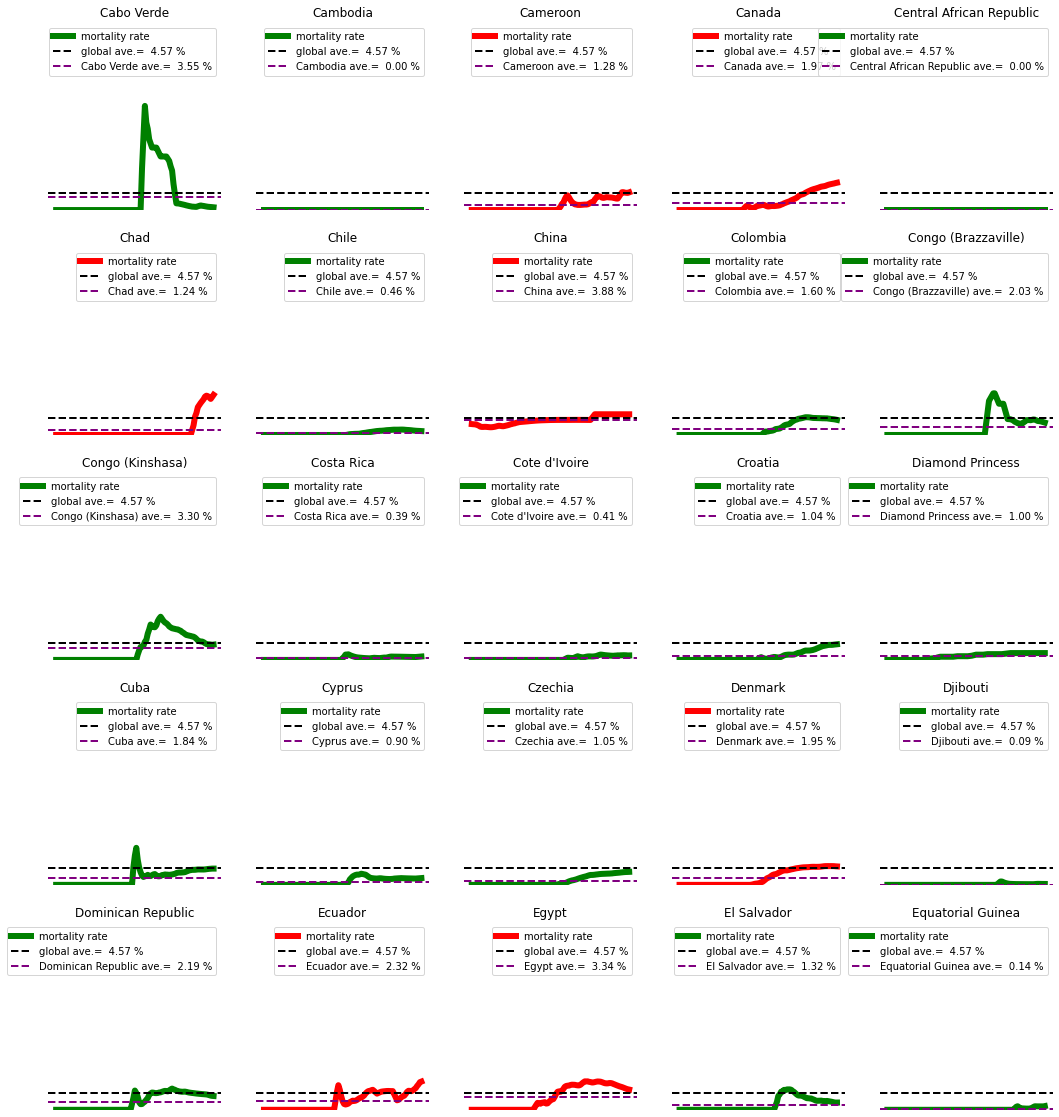

In [129]:
k += 25
plot_cases(k)

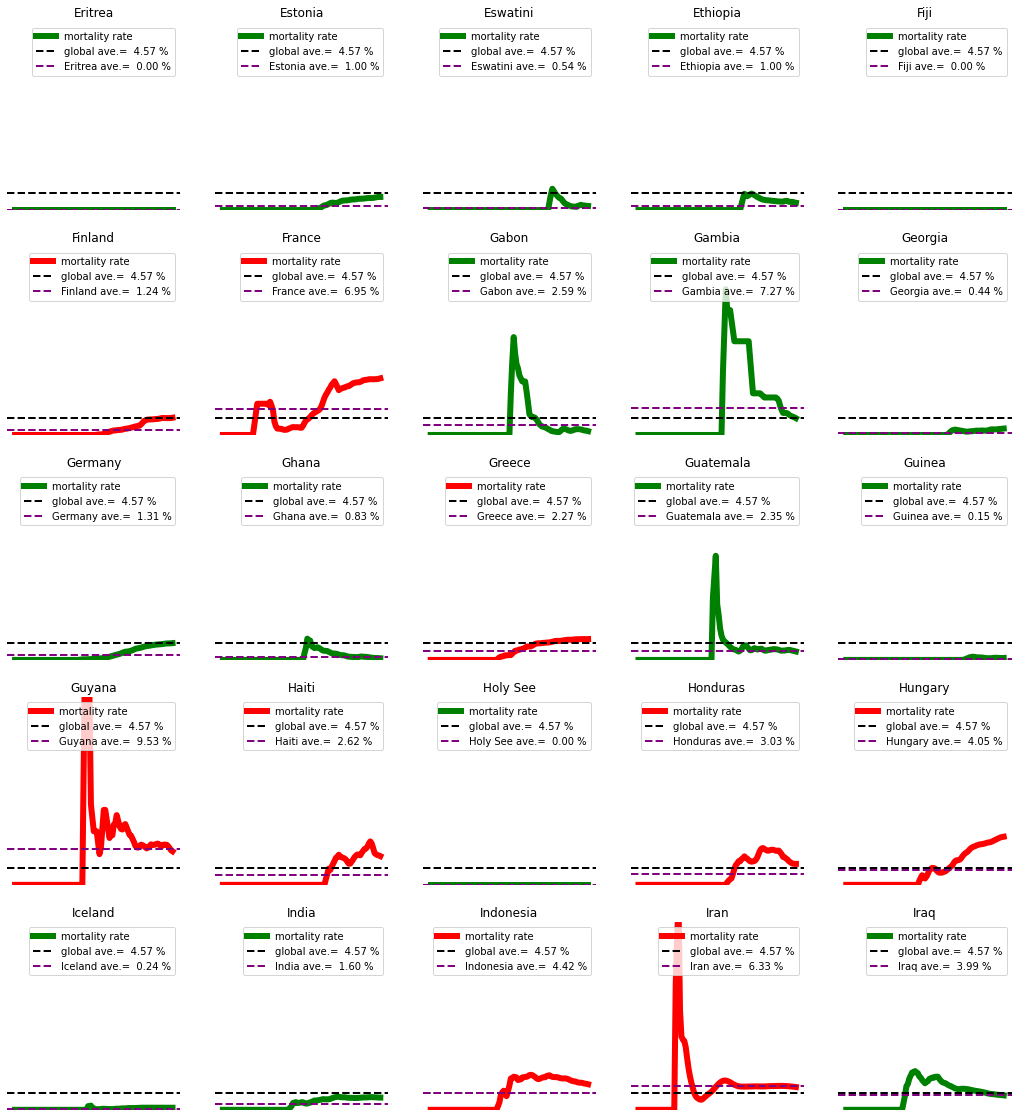

In [130]:
k += 25
plot_cases(k)

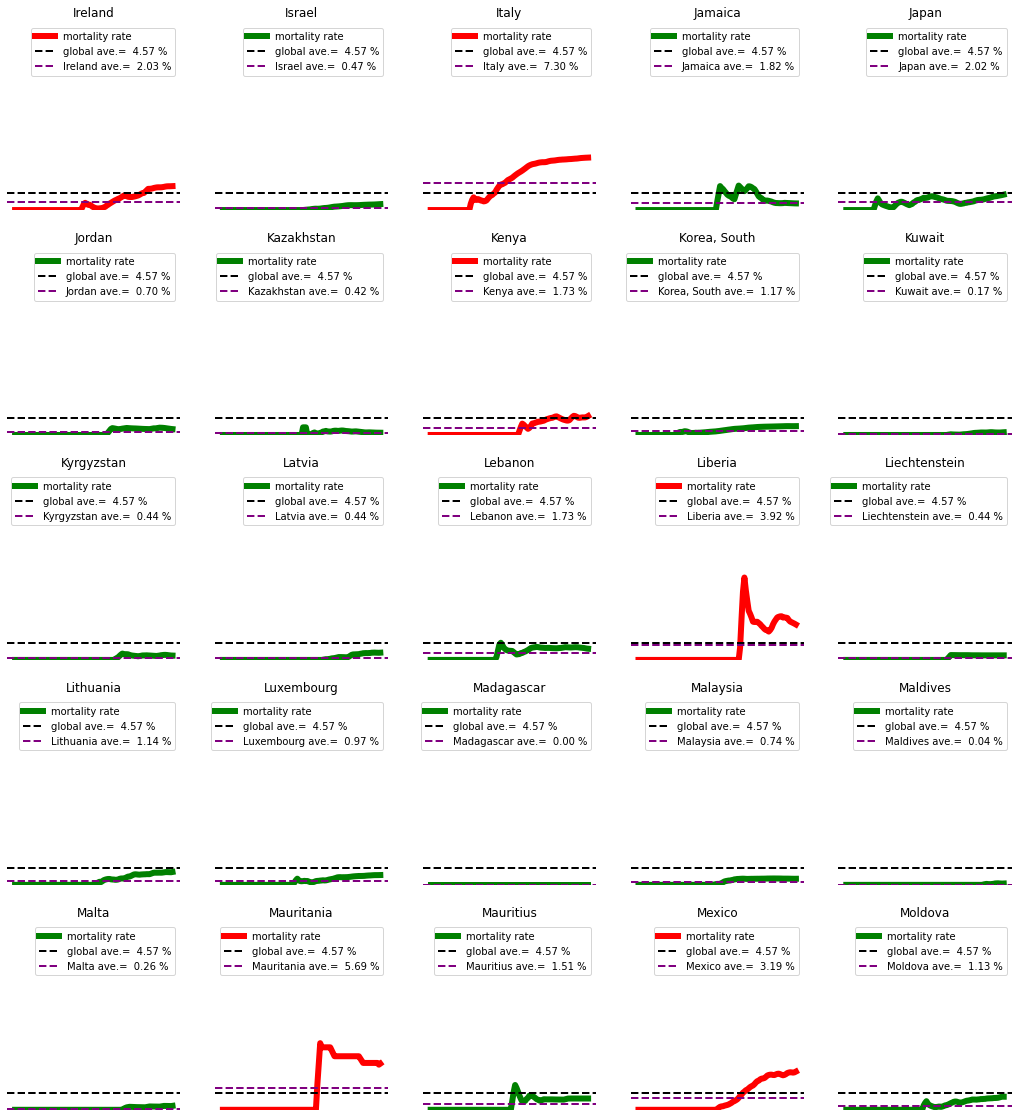

In [131]:
k += 25
plot_cases(k)

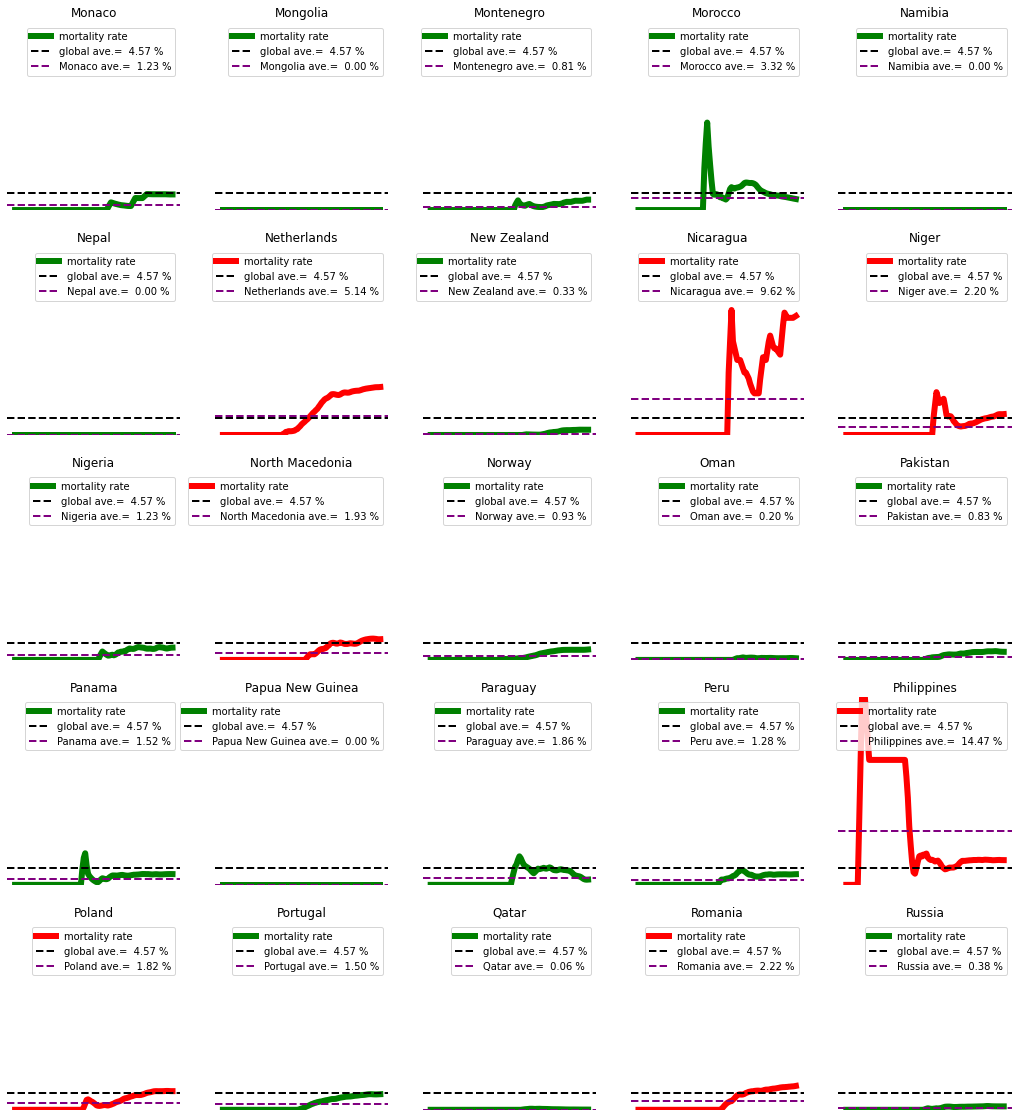

In [132]:
k += 25
plot_cases(k)

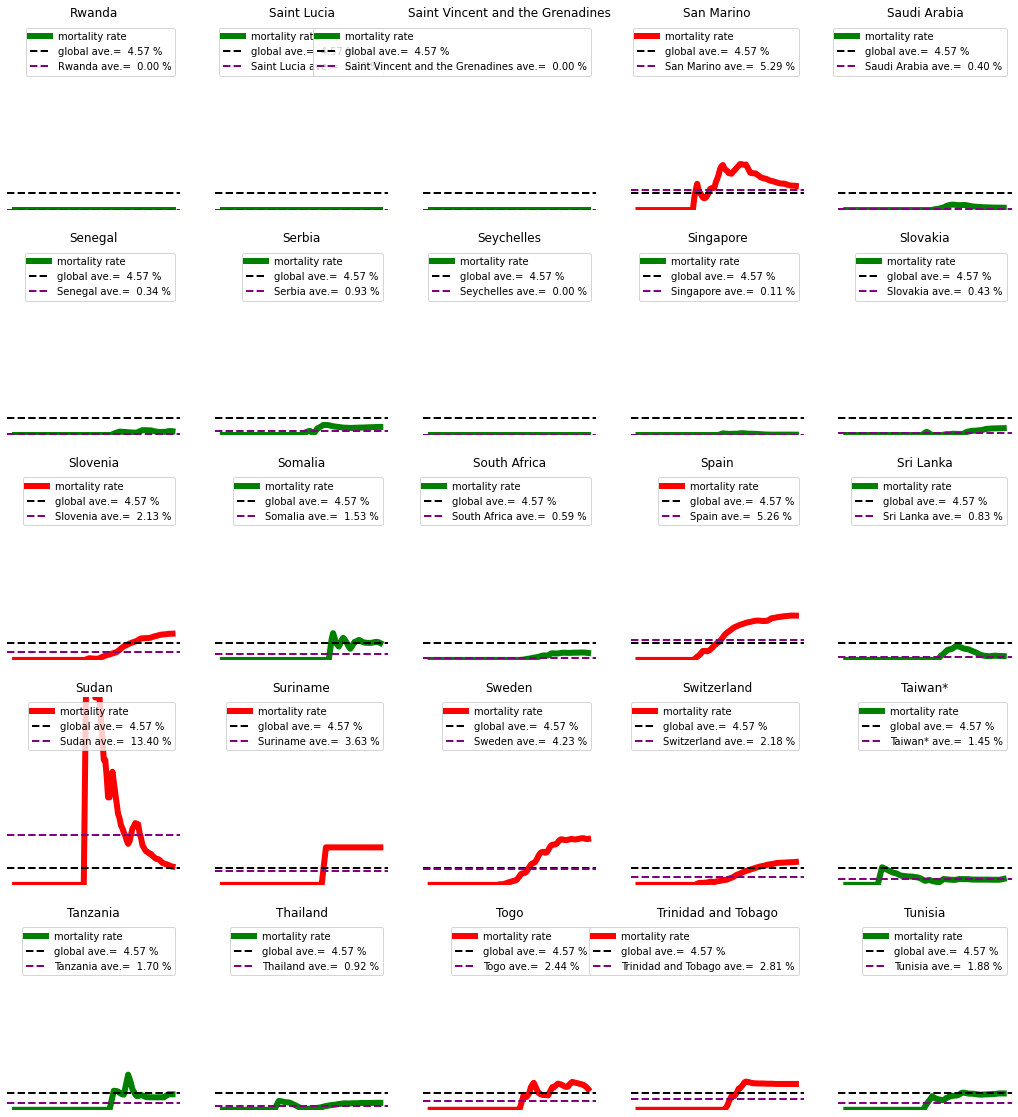

In [133]:
k += 25
plot_cases(k)

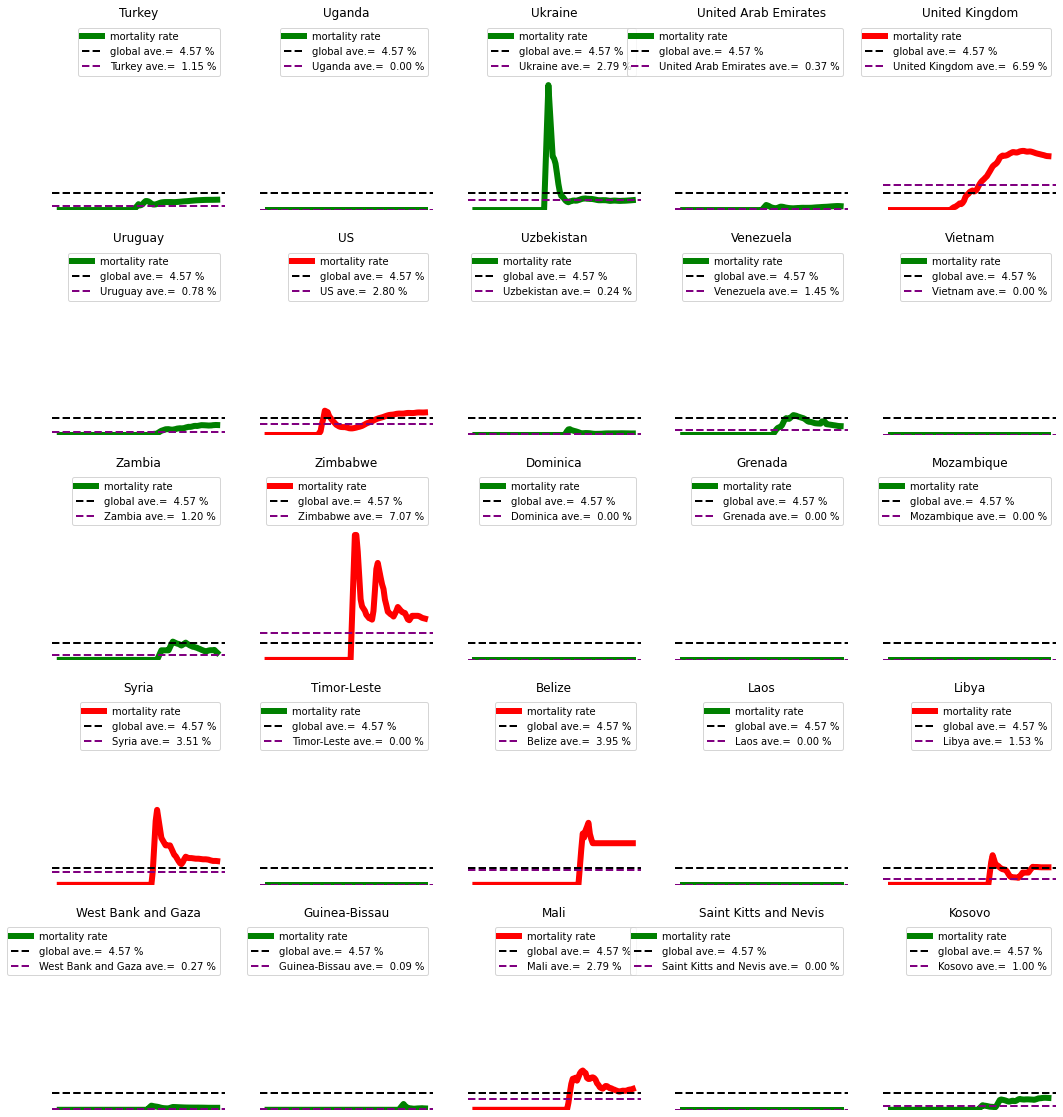

In [134]:
k += 25
plot_cases(k)

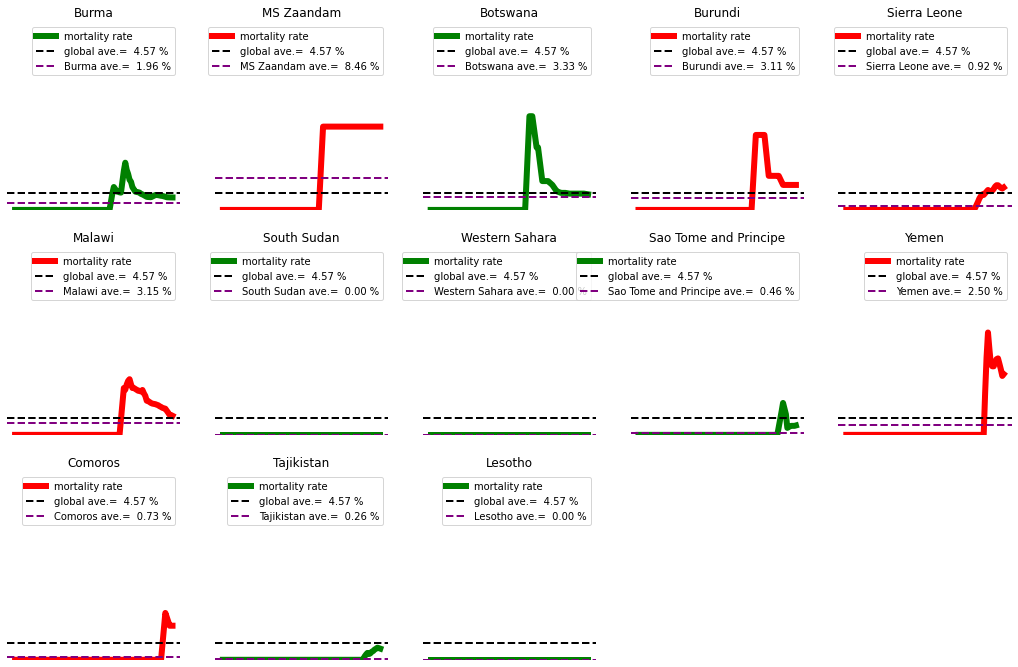

In [135]:
k += 25
plot_cases(k)

# COVID19 ASEAN Cases Comparison

Reported Mean Mortality Rate (Global) =  4.57 %


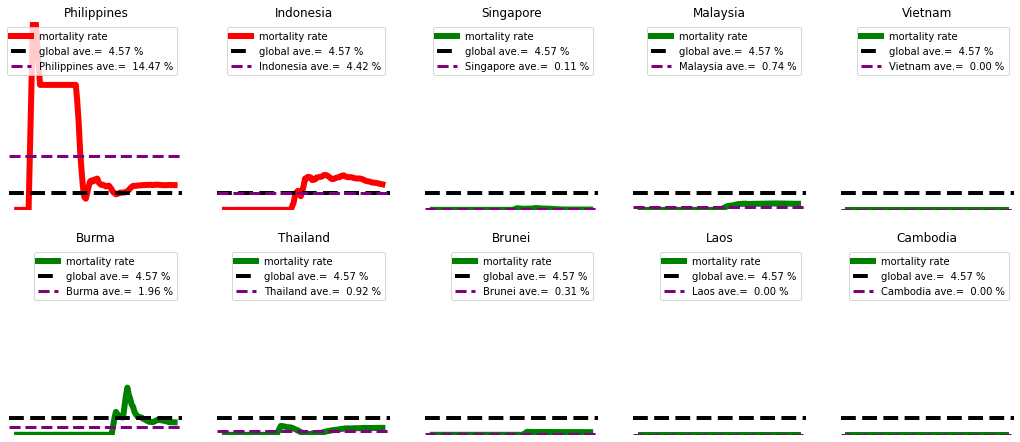

In [125]:
dates   = deaths.keys()
ASEAN = ['Philippines', 'Indonesia',  'Singapore', 'Malaysia', 'Vietnam', 'Burma', 'Thailand', 'Brunei', 'Laos', 'Cambodia']

def plot_cases2(country_list, start = 0, batch_sz= 25, columns = 5): 
    
    print(f'Reported Mean Mortality Rate (Global) = {100*mean_mortality_rate: 0.2f} %')
    
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_list):
            country = country_list[idx-1]
            total_deaths = [deaths_df[deaths_df['Country/Region']==country][i].sum() for i in dates]
            covid_cases  = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
            deaths_arr = np.array(total_deaths)
            cases_arr  = np.array(covid_cases)
            mortality_rate  = pd.Series(np.divide(deaths_arr, cases_arr, out=np.zeros(deaths_arr.shape), where=cases_arr!=0))
            mortality_ma = mortality_rate.rolling(window=3).mean()
            height = mortality_ma.max() - mortality_ma.min()
            if mortality_ma.iloc[-1] < mean_mortality_rate:
                color = 'green'
            else:
                color = 'red'
            
            country_mortality_rate = np.mean(mortality_rate)
                
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), mortality_ma, linewidth=6, color = color)
            plt.axhline(y = mean_mortality_rate,linestyle='--', color='black', linewidth=4)
            plt.axhline(y = country_mortality_rate,linestyle='--', color='purple', linewidth=3)
            plt.legend(['mortality rate', f'global ave.= {100*mean_mortality_rate: 0.2f} %', f'{country} ave.= {100*country_mortality_rate: 0.2f} %'])
            plt.title(f'{country}')
            plt.ylim([0, 0.5])
            plt.axis('off')

    plt.show()
    
    
plot_cases2(ASEAN)

Reported Mean Mortality Rate (Global) =  4.57 %


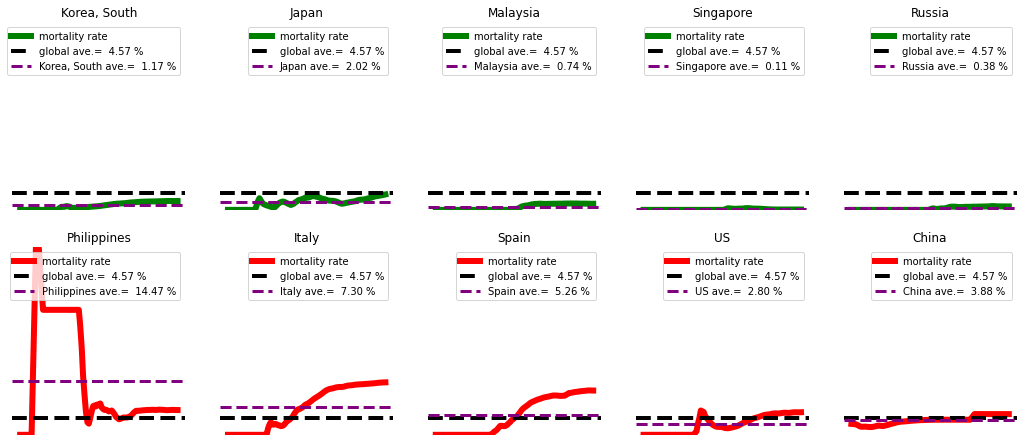

In [126]:
Assorted = [ 'Korea, South', 'Japan','Malaysia', 'Singapore', 'Russia', 'Philippines', 'Italy', 'Spain', 'US', 'China']

plot_cases2(Assorted)